In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re 
import os

## 1. check how oscillator values impact returns

In [3]:
data = pd.DataFrame()

for filename in os.listdir('../data/buy/'):
    if filename.endswith(".txt"): 
        tmp_df = pd.read_csv(os.path.join('../data/buy/', filename), delimiter= '\s+', header = None)
        tmp_df = tmp_df.astype(float)
        data = pd.concat([data, tmp_df])

data = data.drop_duplicates()
df = data.iloc[:, [40, 123]]
df.columns = ['osc', 'rtn']
# remove rows with extreme oscillator values 
df = df[(df['osc'] >= -6) & (df['osc'] <= 6)] 
df['osc_level'] = np.round(df['osc'] * 2) / 2

In [4]:
# osc_level = pd.Series(df.groupby(['osc_level']).mean().index, name='osc_level')
count = pd.Series(df.groupby(['osc_level']).count()['rtn'], name='count') 
mean_rtn = pd.Series(df.groupby(['osc_level']).mean()['rtn'], name='mean_rtn')
std_rtn = pd.Series(df.groupby(['osc_level']).std()['rtn'], name='std_rtn')
summary = pd.concat([count, mean_rtn, std_rtn], axis=1)
summary.to_csv('../data/rtn_vs_osc_summary.csv')

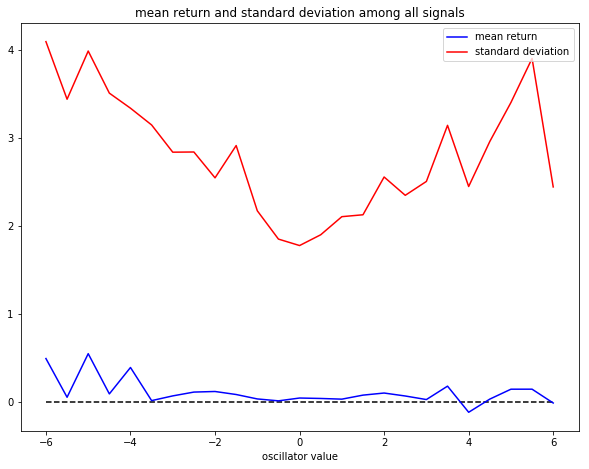

In [5]:
plt.figure(figsize=(10,7.5))
x = df.groupby(['osc_level']).mean().index
mean_rtn = df.groupby(['osc_level']).mean()['rtn']
std_rtn = df.groupby(['osc_level']).std()['rtn']
plt.plot(x, mean_rtn, color='blue', label='mean return')
plt.plot(x, std_rtn, color='red', label='standard deviation')
plt.legend(loc='upper right')
plt.xlabel("oscillator value") 
plt.hlines(0, xmin=-6, xmax=6, colors='black', linestyle='dashed') 
plt.title("mean return and standard deviation among all signals")
plt.savefig("../img/rtn_std_vs_osc.png")

Text(0.5, 1.0, 'mean return among all signals')

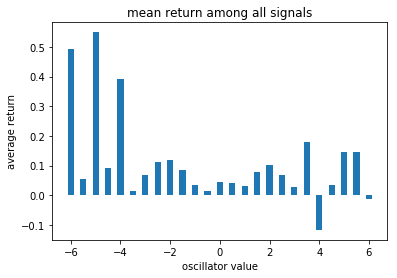

In [6]:
plt.bar(x, mean_rtn, width=0.25)
plt.xlabel("oscillator value")
plt.ylabel("average return") 
plt.title("mean return among all signals")

## 2. check how oscillator works for different stocks 

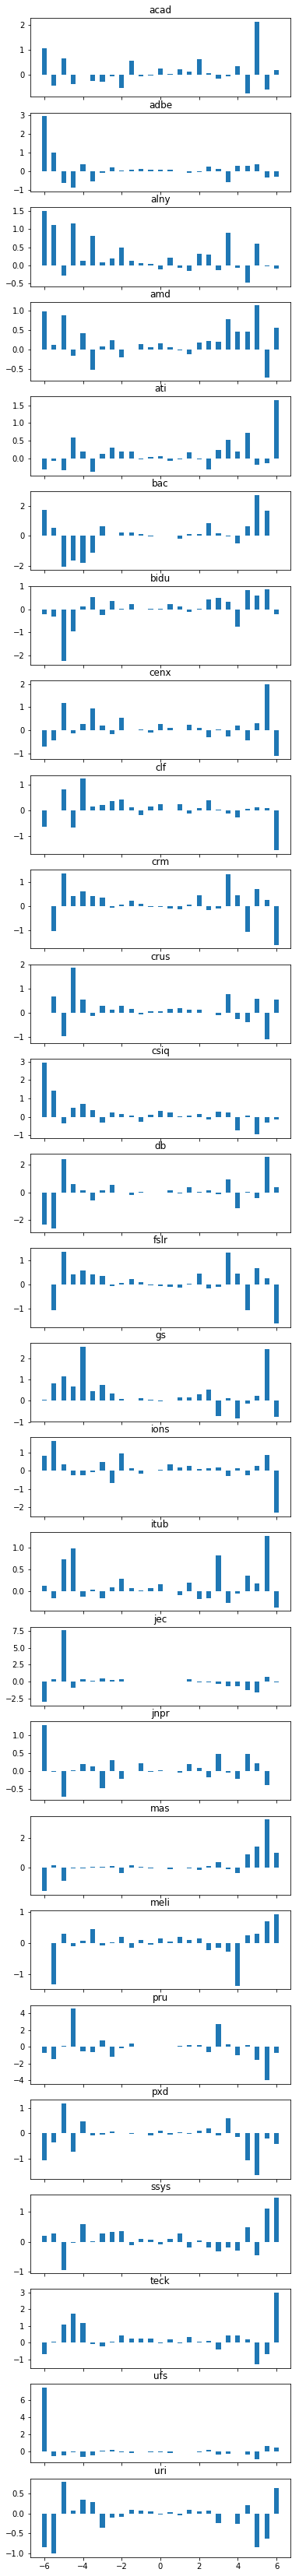

In [16]:
i = 0
fig, axes = plt.subplots(27, 1, sharex=True)
fig.set_figheight(60)
rtn = pd.DataFrame()

for filename in os.listdir('../data/buy/'):
    if filename.endswith(".txt"): 
        symbol = filename.split("1")[0]
        df = pd.read_csv(os.path.join('../data/buy/', filename), delimiter= '\s+', header = None)
        df = df.astype(float)
        df = df.iloc[:, [40, 123]]
        df.columns = ['osc', 'rtn']
        df = df[(df['osc'] >= -6) & (df['osc'] <= 6)] 
        df['osc_level'] = np.round(df['osc'] * 2) / 2
        x = df.groupby(['osc_level']).mean().index
        y = df.groupby(['osc_level']).mean()['rtn']
        rtn[symbol] = y
        # print(symbol, y)
        axes[i].bar(x, y, width=0.25)
        axes[i].title.set_text(symbol)
        i += 1

In [18]:
fig.savefig("../img/rtn_for_diff_stocks.png")

In [19]:
rtn = rtn.fillna(0)
mean_rtn = rtn.mean(axis=1)
std_rtn = rtn.std(axis=1)
rtn['mean_rtn'] = mean_rtn
rtn['std'] = std_rtn

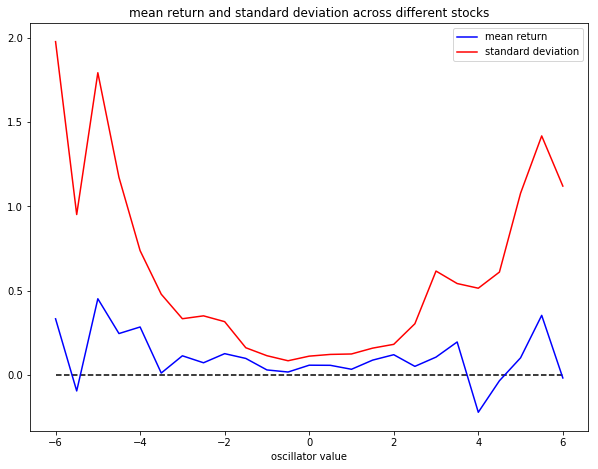

In [20]:
plt.figure(figsize=(10,7.5))
plt.plot(rtn.index, mean_rtn, color='blue', label='mean return')
plt.plot(rtn.index, std_rtn, color='red', label='standard deviation')
plt.legend(loc='upper right')
plt.xlabel("oscillator value") 
plt.hlines(0, xmin=-6, xmax=6, colors='black', linestyle='dashed')
plt.title("mean return and standard deviation across different stocks")
plt.savefig("../img/rtn_std_vs_osc_across_stocks.png")